In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = np.load("./data/sim/data.npz")
ekf = np.load("./results/turtle_ekf.npy")
length = len(ekf)
ground_truth = data["ground_truth"]
# ground_truth = ground_truth[2000:length]
time_gt = data["ground_truth_t"]
odom = data["odom"]
odom_t = data["odom_t"]
odom_ = []
for t in time_gt:
    idx = np.argmin(np.abs(odom_t - t))
    odom_.append(odom[idx])
odom = np.array(odom_)

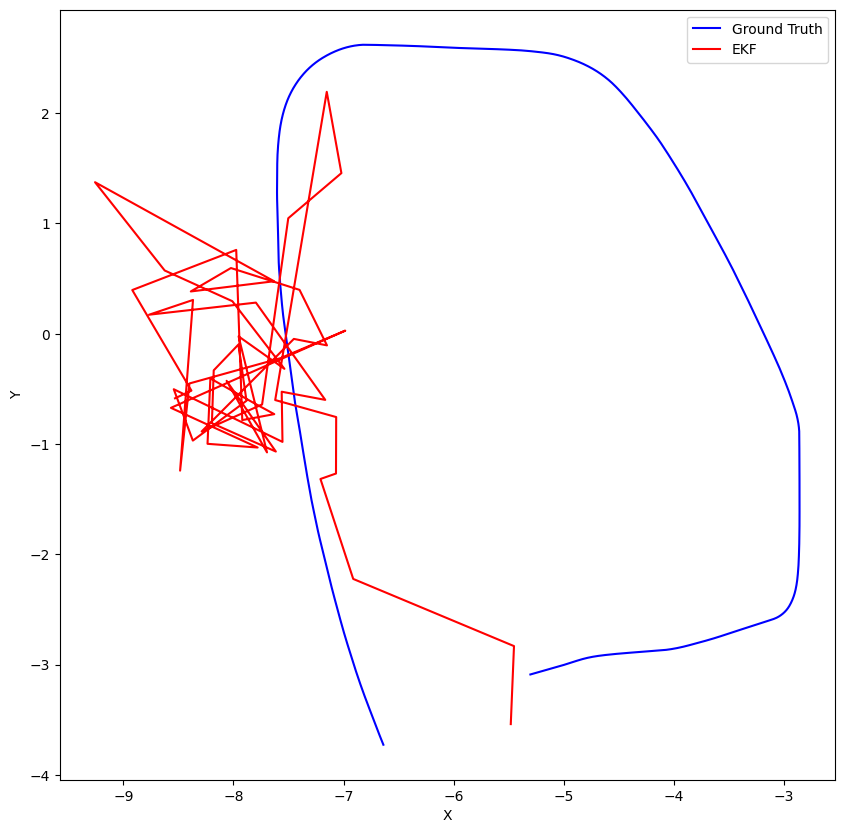

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(ground_truth[:, 0], ground_truth[:, 1], label="Ground Truth", color="blue")
plt.plot(ekf[:, 0], ekf[:, 1], label="EKF", color="red")
# plt.plot(odom[:, 0], odom[:, 1], label="Odom", color="green")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()